In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

# 1. Data Clean and Basic Analysis #

### 1.1 functions ###

In [10]:
# plot function: distribution histogram
def plot_distribution(wine_df, feature):
    value = wine_df[feature]
    plt.hist(value)
    plt.xlabel(feature + ' values')
    plt.ylabel('Frequency')
    plt.title(feature)
    plt.show()

### 1.2 Wine data ###

In [11]:
wine_df = pd.read_csv('./winequality-red.csv', sep = ';')

# Convert the quality rating into binary representation e.g. [6,7,8,9] -> 1, else -> 0
def binaryConversionForQuality(dataframe, columnname):
    for index, row in wine_df.iterrows():
        if row['quality'] >= 6:
            wine_df.at[index, columnname] = 1
        else: 
            wine_df.at[index, columnname] = 0

binaryConversionForQuality(wine_df, 'quality')
# Set the maximum decimal place for the dataframe to be 5
wine_df.loc[:,wine_df.columns!='quality'].astype(float).round(5) 
print(wine_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [12]:
#mean for all fretures 
wine_df.mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  0.534709
dtype: float64

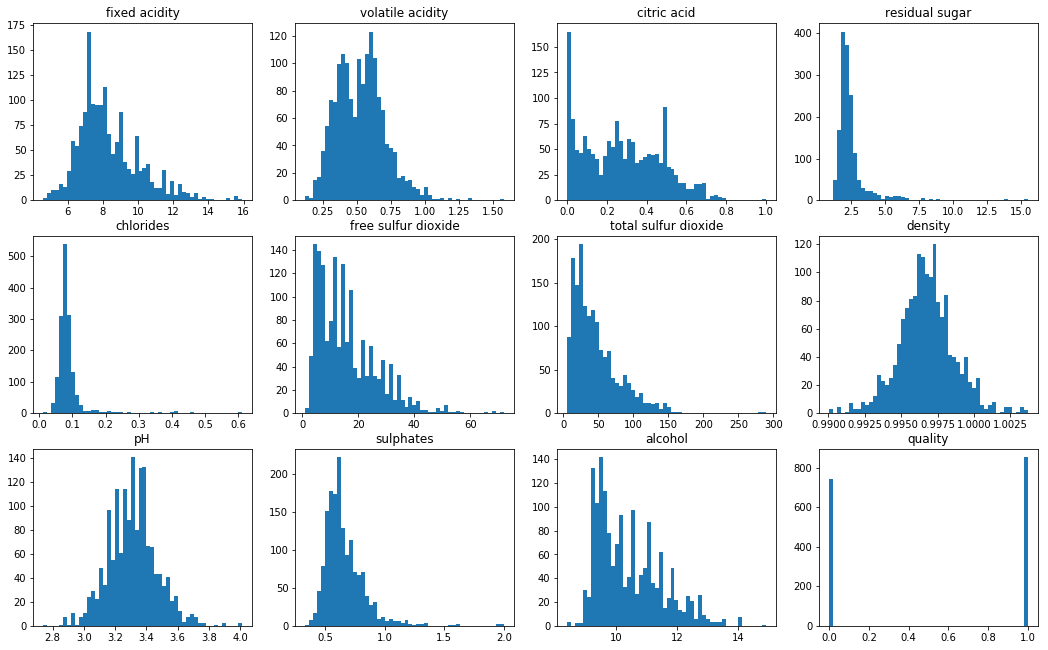

In [27]:
# plot distribution of all features
fig=plt.figure(figsize=(18, 15))
count = 1
for i, column in zip(index, wine_df.columns):
    value = wine_df[column]
    plt.subplot(4,4,i)
    plt.hist(value, bins = 50)
    plt.title(column)
#plt.show()
fig.savefig('../Report/img/wine_distribution.png',bbox_inches='tight')

In [15]:
normalized_wine_df = (wine_df-wine_df.min())/(wine_df.max()-wine_df.min())
#print(wine_df)
print(normalized_wine_df.info())

standardized_wine_df = (wine_df-wine_df.mean())/(wine_df.std())
#print(standardized_wine_df)
print(standardized_wine_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null float64
dtypes: float64(12)
memory usage: 150.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
ch

In [ ]:
from scipy import stats

corr = wine_df.corr(method ='pearson')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(wine_df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(wine_df.columns)
ax.set_yticklabels(wine_df.columns)
plt.show()
fig.savefig('../Report/img/wine_correlation.png',bbox_inches='tight')

### 1.3 Cancer data ###

In [30]:
cancer_df = pd.read_csv('./breast-cancer-wisconsin.data', header=None)
cancer_df.columns =['Patient ID','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal adhesion',
                 'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

In [31]:
# remove missing data row
abandonList =[]
for patient in range(0,698):
    for feature in cancer_df.columns:
        if cancer_df.loc[patient][feature] == '?':
#             if (isinstance(df.loc[patient][feature], int) == "false"): #checking if there is any non-int data
#                 print ("fuck "+ df.loc[patient][feature],int)
            abandonList.append(patient)
cancer_df = cancer_df.drop(abandonList)

In [32]:
cancer_df['Bare Nuclei'] = cancer_df['Bare Nuclei'].astype(int)

In [33]:
# calss 2 set to 0; class 4 set to 1
columnname = 'Class'
for index, row in cancer_df.iterrows():
    if row[columnname] == 2:
        cancer_df.at[index, columnname] = 0
    if row[columnname] == 4:
        cancer_df.at[index, columnname] = 1

In [34]:
print(cancer_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
Patient ID                     683 non-null int64
Clump Thickness                683 non-null int64
Uniformity of Cell Size        683 non-null int64
Uniformity of Cell Shape       683 non-null int64
Marginal adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null int64
Bland Chromatin                683 non-null int64
Normal Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(11)
memory usage: 84.0 KB
None


In [35]:
#mean for all fretures 
cancer_df.mean()

Patient ID                     1.076720e+06
Clump Thickness                4.442167e+00
Uniformity of Cell Size        3.150805e+00
Uniformity of Cell Shape       3.215227e+00
Marginal adhesion              2.830161e+00
Single Epithelial Cell Size    3.234261e+00
Bare Nuclei                    3.544656e+00
Bland Chromatin                3.445095e+00
Normal Nucleoli                2.869693e+00
Mitoses                        1.603221e+00
Class                          3.499268e-01
dtype: float64

In [36]:
# cancer data to matrix
# cancer_x = cancer_df.loc[:,cancer_df.columns!='Patient ID']
# cancer_x = cancer_x.loc[:,cancer_df.columns!='Class']
# cancer_x = np.array (cancer_x)
# cancer_y = cancer_df["Class"]
# cancer_y = np.array([[yi] for yi in cancer_y])

# print(cancer_x.shape)
# print(cancer_y.shape)
cancer_df = cancer_df.loc[:,cancer_df.columns!='Patient ID']

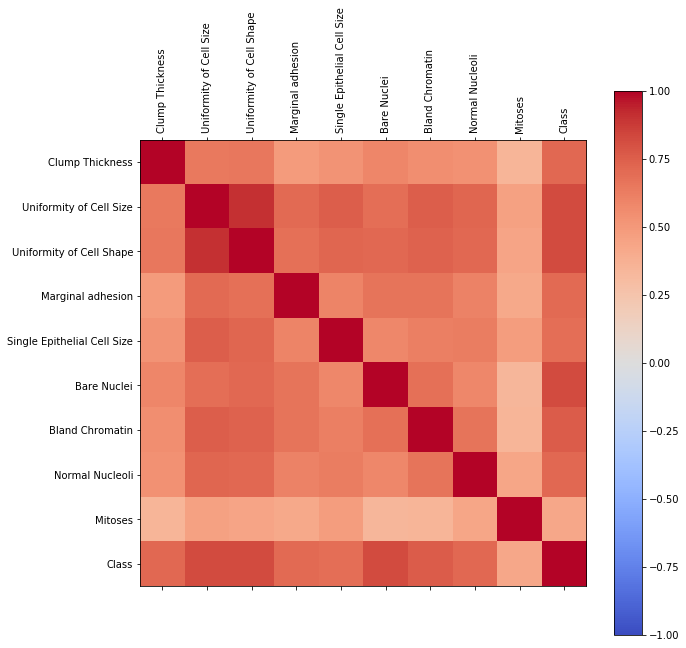

In [38]:
from scipy import stats

corr = cancer_df.corr(method ='pearson')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(cancer_df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(cancer_df.columns)
ax.set_yticklabels(cancer_df.columns)
plt.show()
fig.savefig('../Report/img/cancer_correlation.png',bbox_inches='tight')

# Part 2#

### 2.1 Logistic Regression ###

In [104]:
import math

class LogisticRegression(object):
    
    def __init__(self):
        pass
    
    def logictic_function (self, a):
        try:
            expa = math.exp(-a)
        except OverflowError:
            expa = float('inf')
        sigma = 1 / (1+expa)
        return sigma
    
    def fit (self, x, y, rate, iteration):
        i = 1
        w = np.zeros((len(x[0]),1))
        w_next = np.zeros((len(x[0]),1))
        
        
        while i<iteration: 
            w = w_next
            
            derivative = np.zeros((len(x[0]),1))
            for j in range (0, len(x)):
                xj = np.array([[element] for element in x[j]])
                sigma = self.logictic_function ( np.matmul(np.transpose(w), xj) )
                derivative = np.add (derivative,  np.array( [[element] for element in xj @ (y[j] - sigma)])  )
            w_next = np.add(w, rate(i) * derivative)
            
            i = i + 1
            
        self.w = w_next
        
    
    def predict (self, x):
        return np.array(list(map(lambda xi: [1] if np.sum([xi] @ self.w) > 0 else [0], x)))

In [105]:
# LRModel = LogisticRegression()
# LRModel.fit (cancer_x, cancer_y, lambda n: 0.001/(n+1), 2)
# LRModel.predict(cancer_x)


### 2.2 LDAClassifier ###

In [106]:
class LDAClassifier(object):
    
    def __init__(self, psudo_inv=False):
        """
        Provide an option of psudo inverse just in case not invertable
        """
        self.psudo_inv = psudo_inv 

    def fit(self, x, y):
        """
        Input dim of x is number of case x number of features
                     y is number of case x 1
        Output       None
        """
        self.n = np.array(y).size
        self.n1 = np.sum(y)
        self.n0 = self.n - self.n1
        self.p0 = self.n0 / self.n
        self.p1 = self.n1 / self.n
        # This is, however, transpose of u0 and u1, since its shape is (m,)
        self.u0 = np.sum([xi for xi, yi 
                             in list(zip(x, y)) 
                             if yi == 0], axis=0) / self.n0
        self.u1 = np.sum([xi for xi, yi 
                             in list(zip(x, y)) 
                             if yi == 1], axis=0) / self.n1
        # since x supposed to be a column vector of rv x1 to xm
        # this (x - ui)(x - ui)T is actually computed with transpose of
        # x and ui (x passed as ncase x nfeature (n x m))
        # so the computation becomes (xT - uiT)T(xT - uiT) 
        xxT = lambda v: np.transpose(v) @ np.array(v)
        # test: 
        # print(np.sum([xxT([x[0] - self.u0]), \
        #               xxT([x[3] - self.u0])], axis=0))
        self.sigma = (np.sum([xxT(np.array([xi - self.u0]))
                              for xi, yi 
                              in list(zip(x, y))
                              if yi == 0], axis=0) + 
                      np.sum([xxT(np.array([xi - self.u1]))
                              for xi, yi 
                              in list(zip(x, y))
                              if yi == 1], axis=0)) / (self.n - 2)
        self.sigma_inv = np.linalg.pinv(self.sigma) \
                         if self.psudo_inv \
                         else np.linalg.inv(self.sigma)
        # test: 
        # print(np.sum(np.array([self.u1]) @ 
        #              self.sigma_inv @ 
        #              np.transpose([self.u1])))
        self.w0 = np.log(self.p1 / self.p0) - \
                  (1 / 2) * np.sum(np.array([self.u1]) @ \
                                   self.sigma_inv @ \
                                   np.transpose([self.u1])) + \
                  (1 / 2) * np.sum(np.array([self.u0]) @ \
                                   self.sigma_inv @ \
                                   np.transpose([self.u0]))
        # test: 
        # print(self.sigma_inv @ np.transpose([self.u1 - self.u0]))
        self.w = self.sigma_inv @ \
                 np.transpose([self.u1 - self.u0])

    def predict(self, x):
        return np.array(list(map(lambda xi: [1] 
                                 if self.w0 + np.sum([xi] @ self.w) > 0 
                                 else [0], x)))

In [107]:
#LDAModel = LDAClassifier()
#LDAModel.fit (cancer_x, cancer_y)

In [108]:
#LDAModel.predict(wine_x)

### 2.3 accuracy ###

In [109]:
def evaluate_acc (actual_y, predicted_y):
    correct_count = 0
    sample_number = len (actual_y)
    for i in range(0, sample_number):
        if (actual_y[i] == predicted_y[i]):
            correct_count = correct_count + 1
    accuracy = correct_count / sample_number
    return accuracy;

In [110]:
#evaluate_acc(wine_y, LDAModel.predict(wine_x))

### 2.4 k fold ###

In [111]:
# split data set into k-fold
def k_fold_split(df, k):
    # randomly shuffle the dataframe
    df = df.reindex(np.random.permutation(df.index))
    data = np.array_split(df, k)
    return data

# perform logistic regression training and validation given the training_set, validation_set
def validation_LRegression(training_set, validation_set, y, iteration):
    training_set_x = np.array(training_set.loc[:,training_set.columns!=y])
    training_set_y = np.array([[yi] for yi in training_set[y]])
    validation_set_x = np.array(validation_set.loc[:,validation_set.columns!=y])
    validation_set_y = np.array([[yi] for yi in validation_set[y]])
    LRModel = LogisticRegression()
    LRModel.fit(np.array(training_set_x),np.array(training_set_y),lambda n: 0.001/(n+1), iteration)
    print('---------------------Logistic Regression Training set accuracy---------------------')
    print('Training set data: ', len(training_set.index))
    prediction = LRModel.predict(validation_set_x)
    validation_accuracy = evaluate_acc(prediction, validation_set_y)
    print('---------------------Logistic Regression Validation set accuracy-------------------')
    print('Validation set data: ', len(validation_set.index))
    print('Validation set accuracy: ', validation_accuracy)
    return validation_accuracy

# perform logistic regression training and validation given the training_set, validation_set
def validation_LDA(training_set, validation_set, y):
    training_set_x = np.array(training_set.loc[:,training_set.columns!=y])
    training_set_y = np.array([[yi] for yi in training_set[y]])
    validation_set_x = np.array(validation_set.loc[:,validation_set.columns!=y])
    validation_set_y = np.array([[yi] for yi in validation_set[y]])
    LDAModel = LDAClassifier()
    LDAModel.fit(np.array(training_set_x),np.array(training_set_y))
    print('----------------------------LDA Training set accuracy------------------------------')
    print('Training set data: ', len(training_set.index))
    prediction = LDAModel.predict(validation_set_x)
    validation_accuracy = evaluate_acc(prediction, validation_set_y)
    print('----------------------------LDA Validation set accuracy----------------------------')
    print('Validation set data: ', len(validation_set.index))
    print('Validation set accuracy: ', validation_accuracy)
    return validation_accuracy
    
def k_fold_validation_LRegression(df, y, k, iteration):
    spliteddf = k_fold_split(df, k)
    accuracy = 0.
    for i in range(0,k):
        validation_set = spliteddf[i]
        training_sets = spliteddf.copy()
        del training_sets[i]
        training_set = pd.concat(training_sets)
        accuracy += validation_LRegression(training_set, validation_set, y, iteration)
    accuracy /= k
    print('----------------------------Logistic Regression %d-fold Validation-----------------'%(k))
    print('Fold: ', k)
    print('Accuracy: ', accuracy)
    print('Error rate: ', 1-accuracy)
        
def k_fold_validation_LDA(df, y, k):
    spliteddf = k_fold_split(df, k)
    accuracy = 0.
    for i in range(0,k):
        validation_set = spliteddf[i]
        training_sets = spliteddf.copy()
        del training_sets[i]
        training_set = pd.concat(training_sets)
        accuracy += validation_LDA(training_set, validation_set, y)
    accuracy /= k
    print('----------------------------LDA %d-fold Validation---------------------------------'%(k))
    print('Fold: ', k)
    print('Accuracy: ', accuracy)
    print('Error rate: ', 1-accuracy)

In [112]:
#wine_df = wine_df.loc[:,wine_df.columns!='fixed acidity']

k_fold_validation_LRegression(wine_df, 'quality', 5, 8000)
#k_fold_validation_LRegression(cancer_df, 'Class', 5, 1000)


---------------------Logistic Regression Training set accuracy---------------------
Training set data:  1279
---------------------Logistic Regression Validation set accuracy-------------------
Validation set data:  320
Validation set accuracy:  0.7125
---------------------Logistic Regression Training set accuracy---------------------
Training set data:  1279
---------------------Logistic Regression Validation set accuracy-------------------
Validation set data:  320
Validation set accuracy:  0.628125
---------------------Logistic Regression Training set accuracy---------------------
Training set data:  1279
---------------------Logistic Regression Validation set accuracy-------------------
Validation set data:  320
Validation set accuracy:  0.634375
---------------------Logistic Regression Training set accuracy---------------------
Training set data:  1279
---------------------Logistic Regression Validation set accuracy-------------------
Validation set data:  320
Validation set accura

In [ ]:
k_fold_validation_LDA(wine_df, 'quality', 5)
#k_fold_validation_LDA(cancer_df, 'Class', 5)